In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
# np.set_printoptions(precision=3, suppress=True)

In [47]:
data = pd.read_csv('tvads.csv', delimiter=';')
data = data.to_numpy()
data = normalize(data, axis=0)
data[:5]

array([[0.09561706, 0.10447888],
       [0.01849178, 0.04916653],
       [0.00714739, 0.04396623],
       [0.06295517, 0.0874597 ],
       [0.07513066, 0.06098541]])

In [72]:
def gd(X, y, lr=1e-3, n_iter=1000, eps=1e-6, verbose=False):
    w = np.random.rand(X.shape[1])
    errors = []
    abs_errors = []
    def gradient(w):
        y_pred = X @ w
        grad = 2 * X.T @ (y_pred - y)
        return grad
    for i in range(n_iter):
        if verbose:
            print(f'Iteration {i}, w = {w}')
        grad = gradient(w)
        # grad_norm = np.linalg.norm(grad)
        grad_norm = grad @ grad # alternative
        if verbose:
            print(f'gradient: {grad}, norm: {grad_norm}')
        w -= lr * grad
        residuals = X @ w - y
        error = np.mean(np.abs(residuals))
        sq_error = np.mean(residuals ** 2)
        errors.append(sq_error)
        abs_errors.append(error)
        if grad_norm < eps:
            break
    return w, errors, abs_errors

X = data[:, 0]
m = data.shape[0] # number of training examples
# X = X[:, None] 
X = np.expand_dims(X, axis=1) # alternative
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
assert X.shape == (m, 2)
y = data[:, 1]
w, errors, abs_errors = gd(X, y, lr=3e-4, n_iter=200, eps=1e-3, verbose=True)
w, errors[-1], abs_errors[-1], len(errors)


Iteration 0, w = [0.60980606 0.65974444]
gradient: [233.53050308  14.32963399], norm: 54741.83427729851
Iteration 1, w = [0.53974691 0.65544555]
gradient: [205.40177288  12.60870995], norm: 42348.8678705535
Iteration 2, w = [0.47812638 0.65166293]
gradient: [180.66110872  11.09506802], norm: 32761.536739935378
Iteration 3, w = [0.42392805 0.64833441]
gradient: [158.90042281   9.76374137], norm: 25344.67501436544
Iteration 4, w = [0.37625792 0.64540529]
gradient: [139.76078095   8.59277037], norm: 19606.911594386293
Iteration 5, w = [0.33432968 0.64282746]
gradient: [122.92648208   7.56284042], norm: 15168.116551146606
Iteration 6, w = [0.29745174 0.64055861]
gradient: [108.11985087   6.65696332], norm: 11734.217313084479
Iteration 7, w = [0.26501578 0.63856152]
gradient: [95.09665761  5.86019707], norm: 9077.716199061617
Iteration 8, w = [0.23648679 0.63680346]
gradient: [83.64208971  5.15939943], norm: 7022.618573983518
Iteration 9, w = [0.21139416 0.63525564]
gradient: [73.56720845  

(array([0.02829988, 0.62167233]),
 0.00024323566526795787,
 0.012061546373663985,
 200)

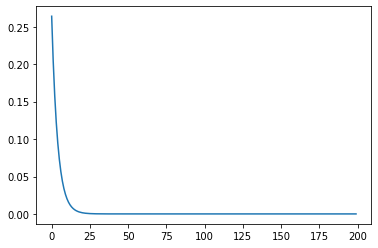

In [73]:
from matplotlib import pyplot as plt
plt.plot(errors)

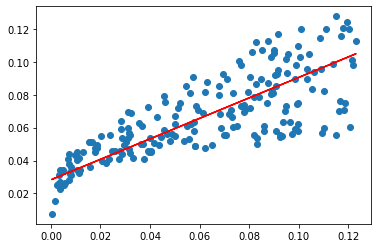

In [74]:
plt.scatter(X[:, -1], y)
plt.plot(X[:, -1], X @ w, color='red')
# plt.plot(X[:, -1], X @ np.zeros(2), color='green')

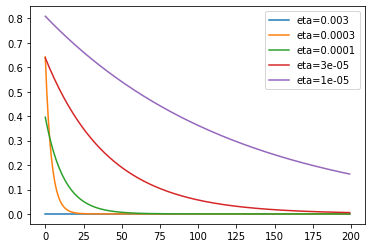

In [69]:
# etas = np.logspace(-10, -4, 13)
etas = [3e-3, 3e-4, 1e-4, 3e-5, 1e-5]
for eta in etas:
    w, errors, abs_errors = gd(X, y, lr=eta, n_iter=200, eps=1e-3)
    plt.plot(errors, label=f'eta={eta}')

plt.legend(loc='best')

0.00024323566526795787